<a href="https://colab.research.google.com/github/Jane0731/Homework/blob/main/AutoKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install autokeras
!pip install tensorflow
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.7/122.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 11.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import autokeras as ak
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 設定隨機種子以確保結果可重複
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# 資料載入
print("資料載入中...")
# 使用加州房價數據集
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target)
print("加州房價數據集載入成功！")

資料載入中...
加州房價數據集載入成功！


In [ ]:
# 資料描述
print("\n== 資料描述 ==")
print(f"數據集大小: {X.shape}")
print(f"特徵數量: {X.shape[1]}")
print("\n特徵概述:")
print(X.describe())


== 資料描述 ==
數據集大小: (20640, 8)
特徵數量: 8

特徵概述:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.35

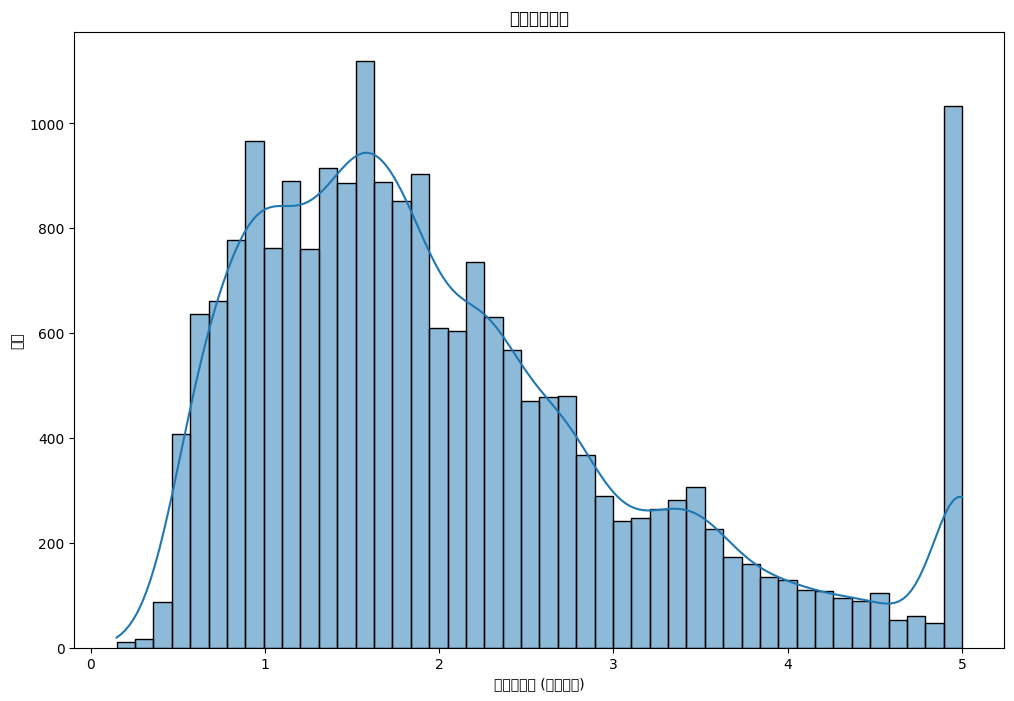

In [ ]:
# 可視化數據分佈
plt.figure(figsize=(12, 8))
sns.histplot(y, kde=True)
plt.title('加州房價分佈')
plt.xlabel('房價中位數 (十萬美元)')
plt.ylabel('頻率')
plt.show()


== 相關性分析 ==


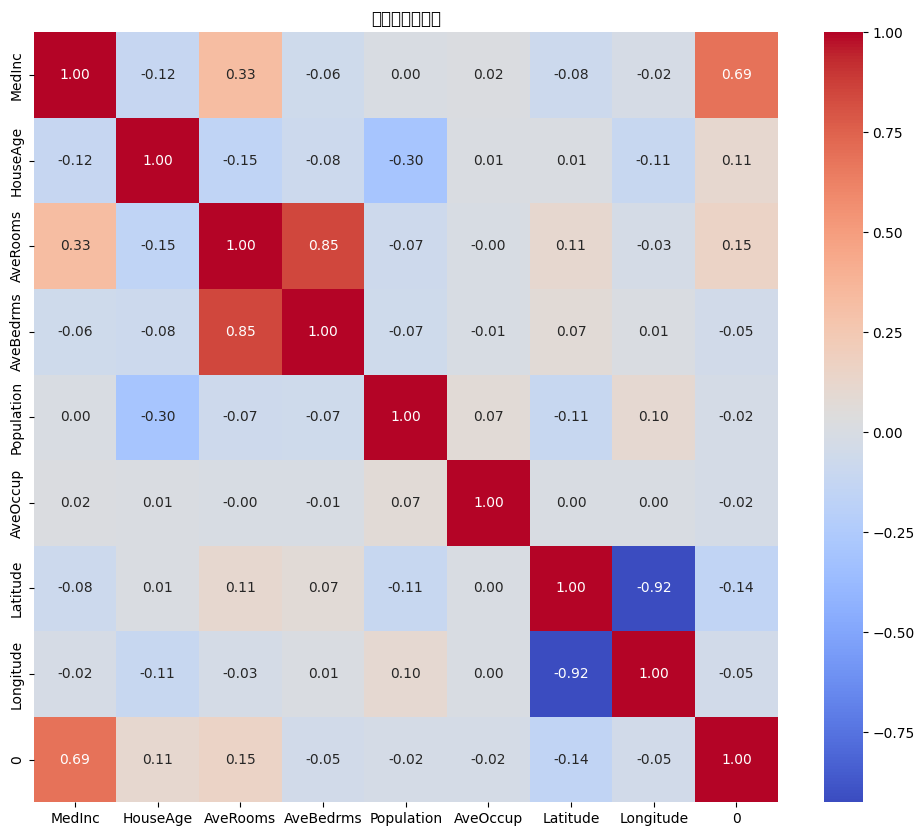

In [ ]:
# 相關性分析
print("\n== 相關性分析 ==")
correlation_matrix = pd.concat([X, y], axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('特徵相關性熱圖')
plt.show()

In [ ]:
# 打印與房價最相關的前5個特徵
if isinstance(y, pd.DataFrame):
    target_column = y.columns[0]
    target_corr = correlation_matrix[target_column].sort_values(ascending=False)
else:
    target_corr = correlation_matrix[0].sort_values(ascending=False)
print("與房價最相關的前5個特徵:")
print(target_corr.iloc[1:6])  # 跳過第一個（它是目標本身）

與房價最相關的前5個特徵:
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Name: 0, dtype: float64


In [ ]:
# 數據預處理
print("\n== 數據預處理 ==")
# 檢查缺失值
print("檢查缺失值:")
print(X.isnull().sum())



== 數據預處理 ==
檢查缺失值:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


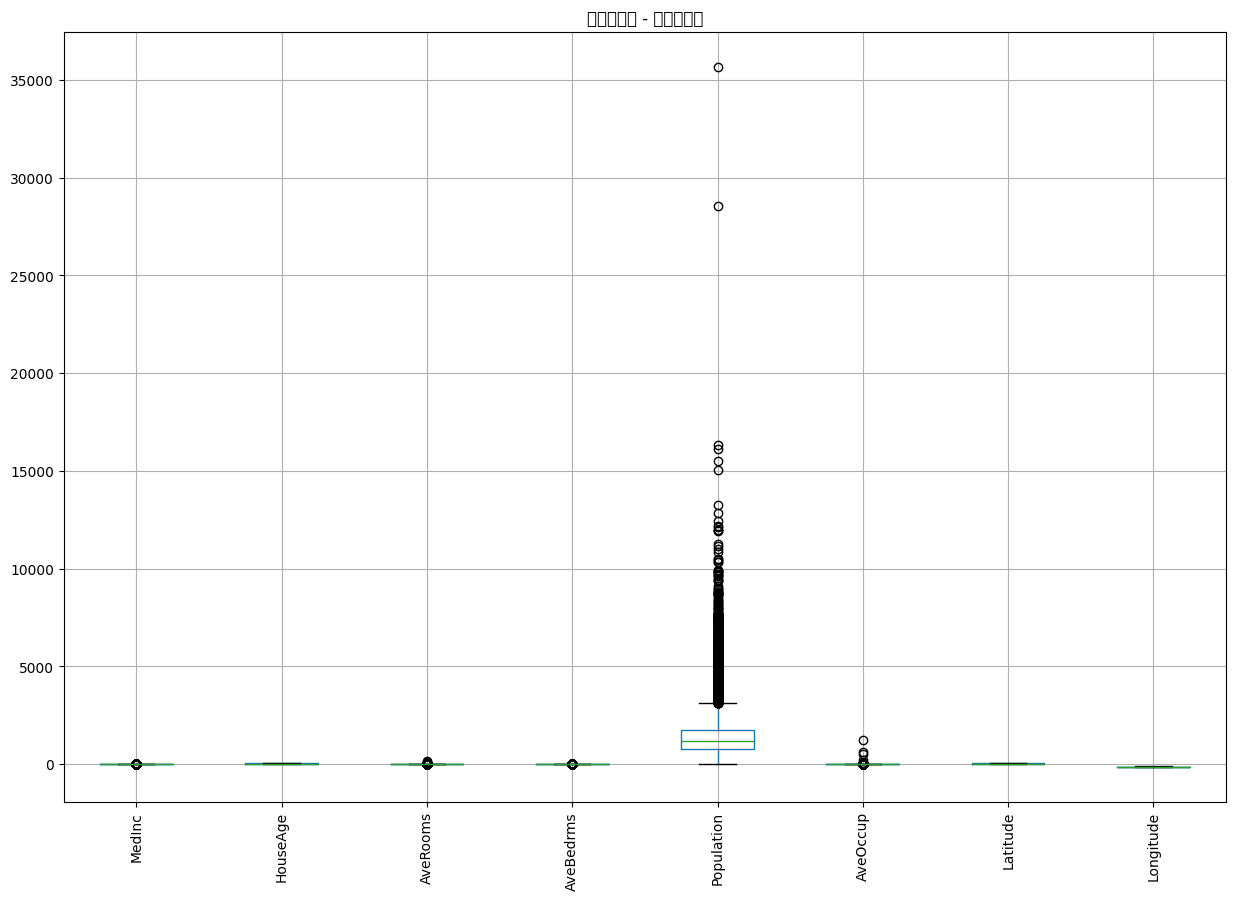

In [ ]:
plt.figure(figsize=(15, 10))
X.boxplot()
plt.title('特徵箱形圖 - 檢查異常值')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 分割數據為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"訓練集大小: {X_train.shape[0]} 樣本")
print(f"測試集大小: {X_test.shape[0]} 樣本")

訓練集大小: 16512 樣本
測試集大小: 4128 樣本


In [ ]:
# 特徵工程
print("== 特徵工程 ==")
# 標準化特徵
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("特徵標準化完成")

== 特徵工程 ==
特徵標準化完成


In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print(f"原始特徵數量: {X_train_scaled.shape[1]}")
print(f"多項式轉換後特徵數量: {X_train_poly.shape[1]}")

原始特徵數量: 8
多項式轉換後特徵數量: 44


In [ ]:
# 確保數據類型正確 - 將DataFrame轉換為numpy數組
X_train_poly = X_train_poly.astype('float32')
X_test_poly = X_test_poly.astype('float32')
y_train = y_train.values.astype('float32')
y_test = y_test.values.astype('float32')

In [ ]:
print("\n== 模型選擇 ==")

# 使用 AutoKeras 2.0.0 的方式來構建模型
input_node = ak.Input()
output_node = ak.RegressionHead()(input_node)

# 創建 AutoModel
model = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    max_trials=5,
    overwrite=True,
    project_name='california_housing'
)


== 模型選擇 ==


In [ ]:
# 確保所有數據都是 float32 類型
X_train_poly = X_train_poly.astype('float32')
X_test_poly = X_test_poly.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [ ]:
# 早停策略
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [ ]:
print("\n== 開始訓練和超參數調整 ==")
print("AutoKeras 將自動搜索最佳模型架構和超參數...")

# 訓練模型 (AutoKeras 會自動搜索最佳超參數)
history = model.fit(
    X_train_poly,  # 使用numpy數組
    y_train,
    validation_split=0.2,
    epochs=50,
    callbacks=[early_stopping],
    verbose=1
)

print("模型搜索和訓練完成！")

Trial 5 Complete [00h 01m 13s]
val_loss: 0.800621747970581

Best val_loss So Far: 0.800621747970581
Total elapsed time: 00h 04m 56s
Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1032.2811 - mean_squared_error: 1032.2811
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 48.2068 - mean_squared_error: 48.2068
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 71.9742 - mean_squared_error: 71.9742
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18.1120 - mean_squared_error: 18.1120
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55.2448 - mean_squared_error: 55.2448
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 39.1099 - mean_squared_error: 39.1099
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 765.7222 - mean_squared_error: 765.7222
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 32.6093 - mean_squared_error: 32.6093
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 522.3957 - mean_sq

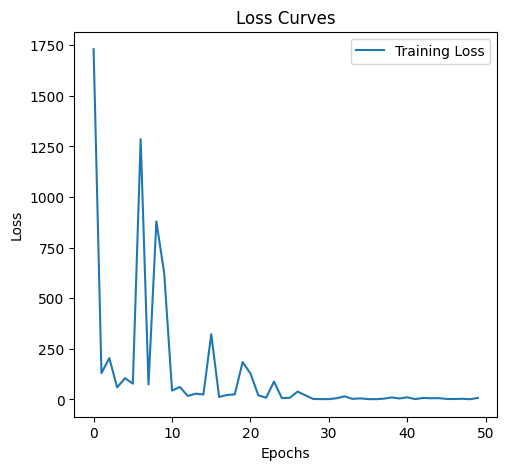

In [ ]:
# 繪製訓練歷史
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

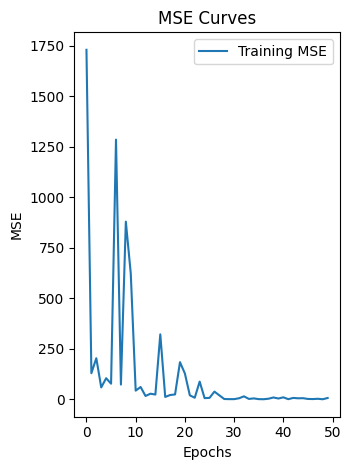

In [ ]:
if 'mean_squared_error' in history.history:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_squared_error'], label='Training MSE')
    plt.title('MSE Curves')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# 獲取最佳模型
best_model = model.export_model()
print("\n最佳模型架構:")
best_model.summary()


最佳模型架構:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 44)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cast_to_float32 (CastToFloat32)      │ (None, 44)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 44)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ regression_head_1 (Dense)            │ (None, 1)                   │              45 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45 (180.00 B)

 Trainable params: 45 (180.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("\n== 模型評估 ==")

# 在測試集上評估模型
y_pred = model.predict(X_test_poly)

# 計算評估指標
if isinstance(y_pred, np.ndarray):
    y_pred_flat = y_pred.flatten()
else:
    y_pred_flat = y_pred

mse = mean_squared_error(y_test, y_pred_flat)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_flat)

print(f"均方誤差 (MSE): {mse:.4f}")
print(f"均方根誤差 (RMSE): {rmse:.4f}")
print(f"決定係數 (R²): {r2:.4f}")


== 模型評估 ==
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
均方誤差 (MSE): 0.7822
均方根誤差 (RMSE): 0.8844
決定係數 (R²): 0.4031


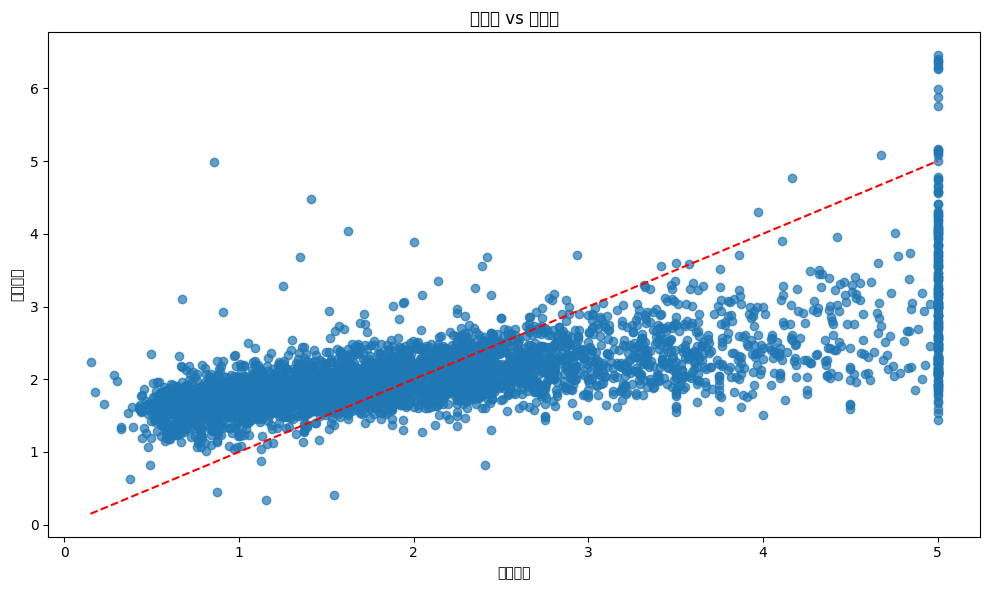

In [ ]:
# 可視化預測結果
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_flat, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('實際房價')
plt.ylabel('預測房價')
plt.title('實際值 vs 預測值')
plt.tight_layout()
plt.show()

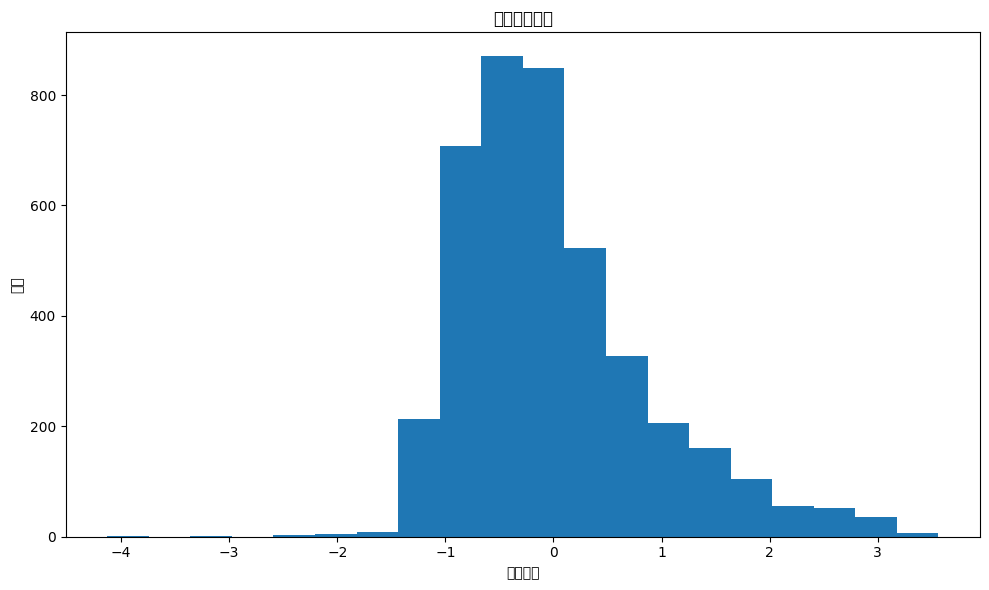

In [ ]:
# 誤差分析
errors = y_test - y_pred_flat
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20)
plt.xlabel('預測誤差')
plt.ylabel('頻率')
plt.title('預測誤差分佈')
plt.tight_layout()
plt.show()
